In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random
import seaborn as sns
 

In [166]:
sorted_data

,date_created,id,lesson_id,user_id,lesson_name,profession_id,profession_name,next_lesson_datetime,delta_seconds
0,2020-04-01 10:00:00,1,101,1,Intro to Data,10,data-analyst,2020-04-01 10:00:02,2.0
2,2020-04-01 10:00:02,2,102,1,Data Methods,10,data-analyst,2020-04-01 10:01:00,58.0
4,2020-04-01 10:01:00,3,103,1,Data Analysis,10,data-analyst,2020-04-01 10:05:00,240.0
6,2020-04-01 10:05:00,7,104,1,Advanced Topics,10,data-analyst,2020-04-01 10:05:04,4.0
7,2020-04-01 10:05:04,8,105,1,Data Presentation,10,data-analyst,NaT,NaN
1,2020-04-02 11:00:00,4,101,2,Intro to Data,10,data-analyst,2020-04-02 11:00:03,3.0
3,2020-04-02 11:00:03,5,102,2,Data Methods,10,data-analyst,2020-04-03 12:00:00,89997.0
5,2020-04-03 12:00:00,6,103,2,Data Analysis,10,data-analyst,NaT,NaN


### **Task 2**

Build a dashboard (using Python or Tableau Public) that quickly answers the following questions:

- "Are there any lessons with completion times under 5 seconds?"
- "How many such lessons are there?"
- "What are the names of these lessons?" (use lesson_id)

Assume that you have all the necessary data for this dashboard, aggregated in the desired manner.

#### Question 1: Are there any lessons with completion times under 5 seconds? 

In [92]:
df

,user_id,lesson_id,lesson_datetime,next_lesson_datetime,delta_seconds,profession_name,current_lesson,next_lesson
0,1,101,2020-04-01 10:00:00,2020-04-01 10:00:02,2.000029,data-analyst,Intro to Data,Data Methods
1,1,104,2020-04-01 10:05:00,2020-04-01 10:05:04,3.999978,data-analyst,Advanced Topics,Data Presentation
2,2,101,2020-04-02 11:00:00,2020-04-02 11:00:03,2.999984,data-analyst,Intro to Data,Data Methods


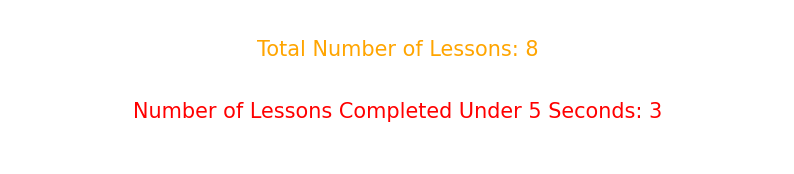

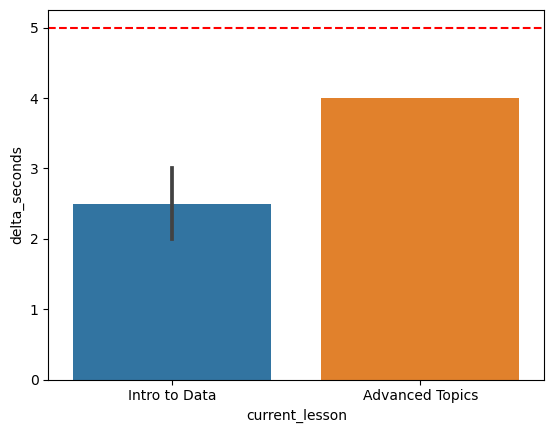

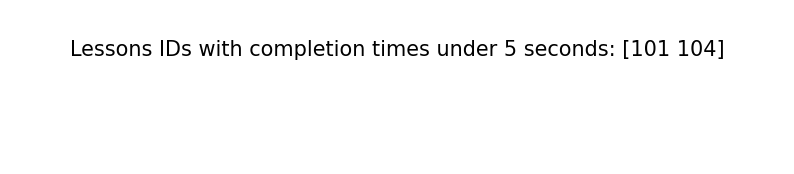

In [117]:
### Question 2: How many such lessons are there?¶
total_lessons = sorted_data.shape[0]
lessons_under_5_seconds = sorted_data[sorted_data['delta_seconds'] < 5].shape[0]
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size to your preference
ax.axis('off')
fig.patch.set_visible(False)
ax.axis('off')
plt.text(0.5, 0.7, f'Total Number of Lessons: {total_lessons}', fontsize=15, ha='center', color='orange')
plt.text(0.5, 0.3, f'Number of Lessons Completed Under 5 Seconds: {lessons_under_5_seconds}', fontsize=15, ha='center', color='red')
plt.show()

### Question 1: Are there any lessons with completion times under 5 seconds?
sns.barplot(x='current_lesson', y='delta_seconds', data=df)
plt.axhline(5, color='red', linestyle='--')  # Line to indicate the 5-second threshold

### Question 3: What are the names of these lessons? (use lesson_id)¶
lessons_ids_under_5_seconds = df.lesson_id.unique()
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size to your preference
ax.axis('off')
fig.patch.set_visible(False)
ax.axis('off')
plt.text(0.5, 0.7, f'Lessons IDs with completion times under 5 seconds: {lessons_ids_under_5_seconds}', fontsize=15, ha='center')
plt.show()

### **Task 3**

You've identified data bugs in Task 3 and need to inform your colleagues via Slack channel. Write a concise and informative message that communicates what happened. Feel free to be creative in how you deliver this news to the team.

In [124]:
text = """
*Data Bug Alert!* 🚨

Hey Team! Hope you're all having a bug-free day—well, almost! I've unearthed some tiny critters in our dataset that need our attention. 🕵️‍♀️

*Here's the buzz:*
We've spotted some super-speedy lesson completions that are faster than a cheetah on a skateboard—under 5 seconds! 🐆💨 While we all love efficiency, this seems a tad too quick, even for our brightest students.

*Stats at a glance:*

- 🕒 Record-breaking completion times: Less than 5 seconds
- 📚 Affected lessons IDs: {}
- 📉 Impact: Might skew our data analytics on user engagement

*Next steps:*

1. I'll drop the details in a report shortly. 📋
2. Let’s pause any data-driven decisions that could be impacted. ⏸️

Let's catch these speedsters and get our dataset back on track! 🛤️
""".format(lessons_ids_under_5_seconds)

In [125]:
print(text)


*Data Bug Alert!* 🚨

Hey Team! Hope you're all having a bug-free day—well, almost! I've unearthed some tiny critters in our dataset that need our attention. 🕵️‍♀️

*Here's the buzz:*
We've spotted some super-speedy lesson completions that are faster than a cheetah on a skateboard—under 5 seconds! 🐆💨 While we all love efficiency, this seems a tad too quick, even for our brightest students.

*Stats at a glance:*

- 🕒 Record-breaking completion times: Less than 5 seconds
- 📚 Affected lessons IDs: [101 104]
- 📉 Impact: Might skew our data analytics on user engagement

*Next steps:*

1. I'll drop the details in a report shortly. 📋
2. Let’s pause any data-driven decisions that could be impacted. ⏸️

Let's catch these speedsters and get our dataset back on track! 🛤️



### **Task 4**

One of the key responsibilities of a Product Analyst at TripleTen is designing and conducting experiments. Answer a few questions and solve a problem.

Questions:

- How do you determine the appropriate sample size for an A/B test?
- What should be included in the experiment brief?
- How are experiment metrics defined, and what qualities should experiment metrics possess?

In [139]:
orders_df = pd.read_csv("orders.csv")
visitors_df = pd.read_csv("visitors.csv")

orders_df.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [140]:
visitors_df.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [143]:
# visitors by each group
visitors_by_group = visitors_df.groupby('group')['visitors'].sum()

print("\nTotal visitors by group:")
print(visitors_by_group)


Total visitors by group:
group
A    18736
B    18916
Name: visitors, dtype: int64


In [145]:
merged_data = pd.merge(orders_df, visitors_df, on=['date', 'group'], how='left')

# CR by each group
conversion_rate_by_group = merged_data.groupby('group').apply(lambda x: x['transactionId'].nunique() / x['visitors'].sum())

print("\nConversion rate by group:")
print(conversion_rate_by_group)


Conversion rate by group:
group
A    0.164097
B    0.164077
dtype: float64


### Sample size based on orders
If the goal is to measure the impact of changes on conversion metrics (e.g., increasing the number of successful orders), 

then calculating the sample size based on orders may be more appropriate:

In [162]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower

# Calculate conversion rate for each group based on visitors
conversion_rate_by_group = merged_data.groupby('group').apply(lambda x: x['transactionId'].nunique() / x['visitors'].sum())

# Calculate pooled conversion rate
pooled_conversion_rate = merged_data['transactionId'].nunique() / merged_data['visitors'].sum()

# Calculate standard error for each group based on visitors
std_err_by_group = merged_data.groupby('group').apply(lambda x: np.sqrt(pooled_conversion_rate * (1 - pooled_conversion_rate) * (1 / x['visitors'].sum() + 1 / x['visitors'].sum())))

# Calculate effect size based on visitor conversion rates
effect_size = (conversion_rate_by_group['B'] - conversion_rate_by_group['A']) / std_err_by_group.mean()

# Set parameters for sample size calculation
alpha = 0.05     # Significance level
power = 0.8      # Desired statistical power

# Initialize TTestIndPower object
power_analysis = TTestIndPower()

# Calculate sample size based on visitors
sample_size_visitors = power_analysis.solve_power(effect_size=effect_size, 
                                                  alpha=alpha, 
                                                  power=power, 
                                                  ratio=1,  # Equal sample sizes for both groups in A/B test
                                                  alternative='two-sided')

print("The required sample size for the A/B test based on transactions is:", round(sample_size_visitors))

The required sample size for the A/B test based on transactions is: 3586475


### Sample size based on visitors
if the goal is to assess the impact of changes on user behavior overall (e.g., Acquision of new visitors), it may be better to use the sample size based on visitors.

In [163]:
# Calculate conversion rate for each group based on visitors
conversion_rate_by_group = merged_data.groupby('group').apply(lambda x: x['transactionId'].nunique() / x['visitors'].sum())

# Calculate pooled conversion rate based on visitors
pooled_conversion_rate = merged_data['transactionId'].nunique() / merged_data['visitors'].sum()

# Calculate standard error for each group based on visitors
std_err_by_group = merged_data.groupby('group').apply(lambda x: np.sqrt(pooled_conversion_rate * (1 - pooled_conversion_rate) / x['visitors'].sum()))

# Calculate effect size based on visitor conversion rates
effect_size = (conversion_rate_by_group['B'] - conversion_rate_by_group['A']) / std_err_by_group.mean()

# Set parameters for sample size calculation
alpha = 0.05     # Significance level
power = 0.8      # Desired statistical power

# Calculate Z-score for desired significance level
Z = norm.ppf(1 - alpha/2)

# Calculate sample size based on visitors
sample_size_visitors = (2 * pooled_conversion_rate * (1 - pooled_conversion_rate) * (Z + norm.ppf(power))**2) / effect_size**2

print("The required sample size for the A/B test based on visitors is:", round(sample_size_visitors))

The required sample size for the A/B test based on visitors is: 2938


#### What should be included in the experiment brief?

**Objectives**: Need to be stated why the experiment is happening and what you hope to achieve.

**Hypotheses**: Need to be outlined the specific assumptions you're testing with the experiment.

**Groups**: Need to be described the different groups involved, such as the treatment group and the control group.

**Metrics**: Need to be defined the key measurements you'll use to determine the experiment's success.

**Methodology**: Need to be explain how you'll conduct the experiment, including the duration and any specific procedures.

**Timeline**: Need to be provided a schedule for when each part of the experiment will happen.

**Risks**: Need to be identified potential problems and how you plan to deal with them.

**Stakeholders**: Need to be listed the people involved and what they're responsible for.

#### How are experiment metrics defined, and what qualities should experiment metrics possess?

##### Primary metrics:
**Conversion Rate**: The percentage of website visitors who make a purchase. It directly reflects the primary goal of the experiment, which is to increase sales.
    
**Average Order Value (AOV)**: The average amount of money spent by customers in a single transaction. AOV is crucial for understanding the revenue generated by each transaction.

##### Secondary Metrics
 - **Click-Through Rate (CTR)**: The percentage of website visitors who click on a specific link or button. While not directly related to revenue, CTR can provide insights into user engagement and interaction with the website.
 
 - **Bounce Rate**: The percentage of visitors who leave the website without taking any action. A high bounce rate may indicate a poor user experience or ineffective website design.



#### How are experiment metrics defined, and what qualities should experiment metrics possess?

**Relevance**: Metrics should directly measure the desired outcomes of the experiment.

**Validity**: Metrics should accurately reflect user behavior and business performance.

**Reliability**: Metrics should produce consistent results over time and conditions.

**Sensitivity**: Metrics should detect meaningful changes in response to interventions.

**Actionability**: Insights from metrics should guide decision-making and optimizations.

**Accessibility**: Metrics should be easily accessible and interpretable by stakeholders.
